In [2]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,Adagrad, AdamW, Adamax, Adadelta,SGD, Adafactor, Nadam
from keras import regularizers
from keras import utils
import time

In [6]:
# Load dataset
df_train= pd.read_csv('train_data_final.csv').drop(columns = "Unnamed: 0")
df_test= pd.read_csv('test_data_final.csv').drop(columns = "Unnamed: 0")

In [7]:
df_train

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,Participant_ID,Depression,Gender
0,33.883310,0.188470,31.197649,31.198807,31.237043,0.039394,39.990345,28.040092,100.798780,0.000000,...,1.960784,2.061856,0.240000,0.010000,0.225000,0.005000,-53.529380,448,1,1
1,23.442284,0.015231,23.083265,23.519197,23.799660,0.716394,0.000000,0.000000,-0.109734,0.000000,...,3.703704,2.040816,0.080000,0.000000,0.380000,0.000000,-47.326970,448,1,1
2,26.658195,0.095594,24.275490,27.404346,29.017082,4.741592,61.829530,67.673560,20.461290,11.705440,...,3.131991,2.036199,0.344444,0.235472,0.115000,0.087321,-41.121784,448,1,1
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.333334,0.000000,0.000000,0.000000,0.240000,0.000000,-56.265000,448,1,1
4,34.614662,0.005980,34.433628,34.559757,34.764160,0.330532,8.279264,5.828207,8.208370,6.596444,...,5.084746,1.886793,0.420000,0.000000,0.040000,0.020000,-33.531155,448,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13621,24.210863,0.074315,22.729614,24.364570,25.552729,2.823114,236.027050,223.026140,17.912342,16.729284,...,3.489532,1.703407,0.431176,0.320769,0.153333,0.149071,-40.205524,445,0,1
13622,24.474560,0.042466,24.111858,24.372028,25.028412,0.916554,267.128230,115.325676,18.977615,8.727659,...,4.854369,3.061225,0.183333,0.023570,0.123333,0.024944,-41.186493,445,0,1
13623,23.050886,0.030502,22.453773,23.070717,23.605549,1.151775,207.237870,124.685500,14.658444,19.092040,...,6.666667,4.761905,0.135000,0.071589,0.055000,0.025000,-42.982080,445,0,1
13624,23.157020,0.085658,20.968218,23.080606,25.493338,4.525120,98.242060,68.553390,23.518658,4.023709,...,4.255319,3.409091,0.143333,0.016997,0.123333,0.023570,-43.327618,445,0,1


In [8]:
# Get a list of all the column names
ColumnNamesList_train = df_train.columns.values

## Print the number of missing values in all variables
for name in ColumnNamesList_train:
    total_nas = df_train[name].isna().sum()
    print(name, ":", total_nas)

F0semitoneFrom27.5Hz_sma3nz_amean : 1
F0semitoneFrom27.5Hz_sma3nz_stddevNorm : 1
F0semitoneFrom27.5Hz_sma3nz_percentile20.0 : 1
F0semitoneFrom27.5Hz_sma3nz_percentile50.0 : 1
F0semitoneFrom27.5Hz_sma3nz_percentile80.0 : 1
F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2 : 1
F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope : 1
F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope : 1
F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope : 1
F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope : 1
loudness_sma3_amean : 1
loudness_sma3_stddevNorm : 1
loudness_sma3_percentile20.0 : 1
loudness_sma3_percentile50.0 : 1
loudness_sma3_percentile80.0 : 1
loudness_sma3_pctlrange0-2 : 1
loudness_sma3_meanRisingSlope : 1
loudness_sma3_stddevRisingSlope : 1
loudness_sma3_meanFallingSlope : 1
loudness_sma3_stddevFallingSlope : 1
spectralFlux_sma3_amean : 1
spectralFlux_sma3_stddevNorm : 1
mfcc1_sma3_amean : 1
mfcc1_sma3_stddevNorm : 1
mfcc2_sma3_amean : 1
mfcc2_sma3_stddevNorm : 1
mfcc3_sma3_amean : 1
mfcc3_sma3_stddevNorm : 1
mfcc4_sm

In [9]:
# Get a list of all the column names
ColumnNamesList_test = df_test.columns.values

## Print the number of missing values in all variables
for name in ColumnNamesList_test:
    total_nas = df_test[name].isna().sum()
    print(name, ":", total_nas)

F0semitoneFrom27.5Hz_sma3nz_amean : 0
F0semitoneFrom27.5Hz_sma3nz_stddevNorm : 0
F0semitoneFrom27.5Hz_sma3nz_percentile20.0 : 0
F0semitoneFrom27.5Hz_sma3nz_percentile50.0 : 0
F0semitoneFrom27.5Hz_sma3nz_percentile80.0 : 0
F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2 : 0
F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope : 0
F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope : 0
F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope : 0
F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope : 0
loudness_sma3_amean : 0
loudness_sma3_stddevNorm : 0
loudness_sma3_percentile20.0 : 0
loudness_sma3_percentile50.0 : 0
loudness_sma3_percentile80.0 : 0
loudness_sma3_pctlrange0-2 : 0
loudness_sma3_meanRisingSlope : 0
loudness_sma3_stddevRisingSlope : 0
loudness_sma3_meanFallingSlope : 0
loudness_sma3_stddevFallingSlope : 0
spectralFlux_sma3_amean : 0
spectralFlux_sma3_stddevNorm : 0
mfcc1_sma3_amean : 0
mfcc1_sma3_stddevNorm : 0
mfcc2_sma3_amean : 0
mfcc2_sma3_stddevNorm : 0
mfcc3_sma3_amean : 0
mfcc3_sma3_stddevNorm : 0
mfcc4_sm

In [10]:
# Find index of empty row
nullRow_train = df_train[df_train.isnull().any(axis=1)]


# Remove empty row
df_train = df_train[df_train.index != nullRow_train.index[0]]



In [11]:
# Get a list of all the column names
ColumnNamesList = df_train.columns.values

## Print the number of missing values in all variables
for name in ColumnNamesList:
    total_nas=df_train[name].isna().sum()
    print(name, ":", total_nas)

F0semitoneFrom27.5Hz_sma3nz_amean : 0
F0semitoneFrom27.5Hz_sma3nz_stddevNorm : 0
F0semitoneFrom27.5Hz_sma3nz_percentile20.0 : 0
F0semitoneFrom27.5Hz_sma3nz_percentile50.0 : 0
F0semitoneFrom27.5Hz_sma3nz_percentile80.0 : 0
F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2 : 0
F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope : 0
F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope : 0
F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope : 0
F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope : 0
loudness_sma3_amean : 0
loudness_sma3_stddevNorm : 0
loudness_sma3_percentile20.0 : 0
loudness_sma3_percentile50.0 : 0
loudness_sma3_percentile80.0 : 0
loudness_sma3_pctlrange0-2 : 0
loudness_sma3_meanRisingSlope : 0
loudness_sma3_stddevRisingSlope : 0
loudness_sma3_meanFallingSlope : 0
loudness_sma3_stddevFallingSlope : 0
spectralFlux_sma3_amean : 0
spectralFlux_sma3_stddevNorm : 0
mfcc1_sma3_amean : 0
mfcc1_sma3_stddevNorm : 0
mfcc2_sma3_amean : 0
mfcc2_sma3_stddevNorm : 0
mfcc3_sma3_amean : 0
mfcc3_sma3_stddevNorm : 0
mfcc4_sm

In [12]:
# Check for potentially incorrect valuese
df_train.describe()

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,Participant_ID,Depression,Gender
count,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,...,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000
mean,25.745292,0.076929,24.278258,25.694211,27.268849,2.990591,82.345260,69.587039,25.355152,22.313180,...,3.971591,2.477241,0.241971,0.112241,0.191788,0.102848,-42.388196,397.119706,0.288587,0.600147
std,7.797542,0.056443,7.584515,7.895070,8.347925,2.703251,121.029574,111.085653,67.914686,62.056042,...,1.650809,1.180545,0.171297,0.099238,0.335345,0.123444,7.192831,51.145327,0.453122,0.489886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-228.022810,0.000000,-734.346100,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-120.000000,303.000000,0.000000,0.000000
25%,21.714222,0.037168,20.299099,21.492850,22.833477,1.353430,15.516853,1.467776,6.568803,1.835006,...,3.043478,1.834862,0.140000,0.016330,0.100000,0.026247,-45.757977,357.000000,0.000000,0.000000
50%,25.459585,0.067140,23.648668,25.291498,27.103271,2.330517,49.589092,30.792398,15.679526,8.580829,...,3.896104,2.419355,0.207174,0.104983,0.142857,0.077037,-41.693493,391.000000,0.000000,1.000000
75%,31.411427,0.103485,30.213726,31.667706,33.141975,3.769505,108.683495,99.414925,26.759731,17.631786,...,4.761905,3.030303,0.296667,0.168688,0.204000,0.144724,-38.288914,443.000000,1.000000,1.000000
max,62.197670,0.571825,62.193268,62.207660,62.210110,43.667380,4072.700200,1975.245400,3777.268300,2007.705900,...,29.166668,25.000000,2.450000,1.125000,10.429999,3.449389,-17.723944,491.000000,1.000000,1.000000


In [13]:
# Calculate the percentage of zero values in each row
zero_percentages = (df_train == 0).mean(axis=1)

# Filter out rows where more than half of the feature values are zero
threshold = 0.5  # More than half
df = df_train[zero_percentages <= threshold]

# Check if any rows are duplicated
df_train[df_train.duplicated()] # No rows are duplicated

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,Participant_ID,Depression,Gender


In [14]:
# Extract X variables
X_train = df_train.drop(columns=["Depression", "Gender", "Participant_ID"])
X_test = df_test.drop(columns=["Depression", "Gender", "Participant_ID"])
# Extract y variables
y_train = df_train[["Depression", "Gender", "Participant_ID"]]
y_test = df_test[["Depression", "Gender", "Participant_ID"]]

In [15]:
# Standardize X variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [16]:
X_train,X_val,y_train_new,y_val = train_test_split(X_scaled, y_train, test_size=0.15,random_state=3)

In [17]:
rf = RandomForestClassifier(max_depth=7,random_state=3,n_estimators=500)
rf.fit(X_train, np.array(y_train_new["Gender"]))

RandomForestClassifier(max_depth=7, n_estimators=500, random_state=3)

In [18]:
y_pred = rf.predict(X_val)


In [19]:
y_val["Y_pred_val"] = y_pred

In [20]:
metrics.accuracy_score(np.array(y_val.groupby("Participant_ID").agg({"Gender":"max"})["Gender"]),np.array(y_val.groupby("Participant_ID").agg({"Y_pred_val":"max"})["Y_pred_val"]))

0.7471264367816092

In [21]:
rf = RandomForestClassifier(max_depth=7,random_state=3,n_estimators=500)
rf.fit(X_scaled, np.array(y_train["Gender"]))

RandomForestClassifier(max_depth=7, n_estimators=500, random_state=3)

In [22]:
y_pred = rf.predict(X_scaled_test)
y_test["Test_pred"] = y_pred

/var/folders/12/c77x243n0cv4m_7jxmfpwxmc0000gn/T/ipykernel_48699/560069950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["Test_pred"] = y_pred


In [104]:

metrics.accuracy_score(np.array(y_test.groupby("Participant_ID").agg({"Gender":"max"})["Gender"]),np.array(y_test.groupby("Participant_ID").agg({"Test_pred":"max"})["Test_pred"]))

0.5

In [23]:
metrics.balanced_accuracy_score(np.array(y_test.groupby("Participant_ID").agg({"Gender":"max"})["Gender"]),np.array(y_test.groupby("Participant_ID").agg({"Test_pred":"max"})["Test_pred"]))

0.5625

In [24]:
X_train.shape

(11581, 88)

In [25]:
utils.set_random_seed(3)
model3 = Sequential()
model3.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],),kernel_regularizer=regularizers.L2(0.001)))
model3.add(Dense(32, activation='relu',kernel_regularizer=regularizers.L2(0.0005)))
# model3.add(Dense(16, activation='relu',kernel_regularizer=regularizers.L2(0.01)))
model3.add(Dense(16, activation='relu',kernel_regularizer=regularizers.L2(0.0001)))
model3.add(Dense(1, activation="sigmoid"))
model3.summary()
model3.compile(loss="binary_crossentropy", optimizer = Adam(learning_rate=0.001),metrics=["accuracy"])
start_time = time.time()
trained_model = model3.fit(X_train, np.array(y_train_new["Gender"]), 
                           epochs=25,batch_size=16, 
                           validation_data=(X_val, np.array(y_val["Gender"])),
                           class_weight = {0: 0.7, 1: 2})
end_time = time.time()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                2848      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4449 (17.38 KB)
Trainable params: 4449 (17.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/25
724/724 [==============================] - 1s 572us/step - loss: 0.3306 - accuracy: 0.8846 - val_loss: 0.2340 - val_accuracy: 0.9354
Epoch 2/25
724/724 [==============================] - 0s 462us/step - loss: 0.1957 - accuracy: 0.9448 - val_loss: 0.2016 - val_accuracy: 0.9408
Epoch 3/25
724/724 [==============================] - 0s 444us/step - loss: 0.1687 - accuracy: 0.9514 - val_loss: 0.1975 - val_accuracy: 0.9442
Epoch 4/25
724/724 [==============================] - 0s 442us/step - loss: 0.1524 - accuracy: 0.9535 - val_loss: 0.1832 - val_accuracy: 0.9477
Epoch 5/25
724/724 [==============================] - 0s 435us/step - loss: 0.1392 - accuracy: 0.9579 - val_loss: 0.1793 - val_accuracy: 0.9516
Epoch 6/25
724/724 [==============================] - 0s 451us/step - loss: 0.1325 - accuracy: 0.9589 - val_loss: 0.1844 - val_accuracy: 0.9481
Epoch 7/25
724/724 [==============================] - 0s 458us/step - loss: 0.1262 - accuracy: 0.9602 - val_loss: 0.2010 - val_accuracy:

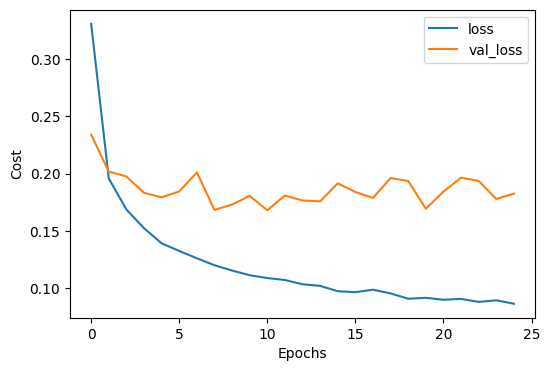

In [26]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.plot(trained_model.history["loss"], label="loss")
plt.plot(trained_model.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.show()

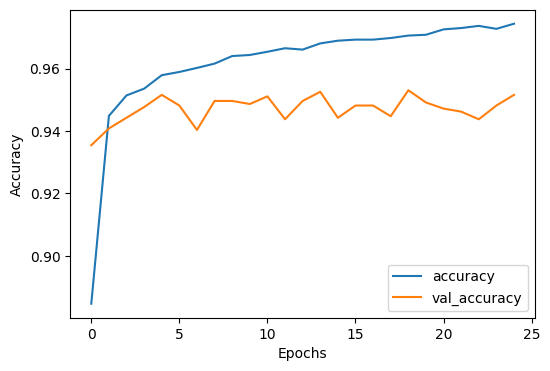

In [27]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.plot(trained_model.history["accuracy"], label="accuracy")
plt.plot(trained_model.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [28]:

test_loss, test_acc = model3.evaluate(X_scaled_test,  np.array(y_test["Depression"]))
print("Test loss: ", test_loss)
print("Test accuracy: ", test_acc)

103/103 [==============================] - 0s 297us/step - loss: 5.9566 - accuracy: 0.3000
Test loss:  5.956629753112793
Test accuracy:  0.30000001192092896


In [29]:
y_pred = model3.predict(X_scaled_test)
y_test["Test_pred"] = np.where(y_pred>=0.5,1,0)

103/103 [==============================] - 0s 279us/step


/var/folders/12/c77x243n0cv4m_7jxmfpwxmc0000gn/T/ipykernel_48699/3147699589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["Test_pred"] = np.where(y_pred>=0.5,1,0)


In [33]:
metrics.accuracy_score(np.array(y_test.groupby("Participant_ID").agg({"Gender":"mean"})["Gender"]),np.array((y_test.groupby("Participant_ID").agg({"Test_pred":"mean"})["Test_pred"] >= 0.5).astype(int)))

0.95

In [35]:
metrics.balanced_accuracy_score(np.array(y_test.groupby("Participant_ID").agg({"Gender":"mean"})["Gender"]),np.array((y_test.groupby("Participant_ID").agg({"Test_pred":"mean"})["Test_pred"] > 0.5).astype(int)))

0.9375

Confusion Matrix 
 [[ 7  1]
 [ 0 12]]


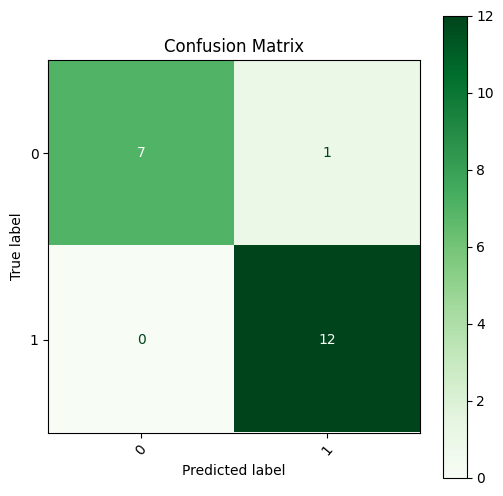

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score

conf_matrix = confusion_matrix(np.array(y_test.groupby("Participant_ID").agg({"Gender":"mean"})["Gender"]),np.array((y_test.groupby("Participant_ID").agg({"Test_pred":"mean"})["Test_pred"] >= 0.5).astype(int)))
print("Confusion Matrix \n", conf_matrix)

#Visualizing the confusion matrix
plt.rcParams['figure.figsize'] = (6, 6)
display_c_m = ConfusionMatrixDisplay(conf_matrix)
display_c_m.plot(cmap='Greens', xticks_rotation=50)
plt.title('Confusion Matrix')
plt.show()